### データ理解

In [66]:
classes = {
    0 : 'L',
    1 : 'O',
    2 : 'V',
    3 : 'E',
}
classes

{0: 'L', 1: 'O', 2: 'V', 3: 'E'}

In [67]:
import tensorflow as tf

x_train = tf.constant(
    [
        [
            [1, 0, 0, 0, 0],
            [1, 0, 0, 0, 0],
            [1, 0, 0, 0, 0],
            [1, 0, 0, 0, 0],
            [1, 1, 1, 1, 1],
        ],
        [
            [1, 1, 1, 1, 1],
            [1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1],
            [1, 1, 1, 1, 1],
        ],
        [
            [1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1],
            [0, 1, 1, 1, 0],
            [0, 0, 1, 0, 0],
        ],
        [
            [1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0],
            [1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0],
            [1, 1, 1, 1, 1],
        ],
    ]
)

In [68]:
x_train.shape

TensorShape([4, 5, 5])

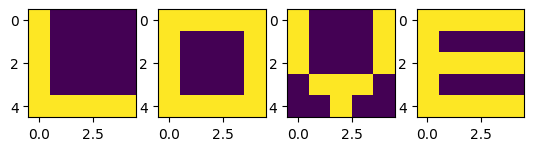

In [69]:
import matplotlib.pyplot as plt

words = x_train.shape[0]

for i in range(words):
    plt.subplot(1, words, i+1)
    plt.imshow(x_train[i])
plt.show()

In [70]:
y_train = tf.constant([0., 1., 2., 3.])

### モデル構築

In [71]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.fc1 = tf.keras.layers.Dense(32)
        self.fc2 = tf.keras.layers.Dense(32)
        self.fc3 = tf.keras.layers.Dense(4)
        self.loss_tracker = tf.keras.metrics.Mean(name="loss")

    def call(self, x):
        x = self.flatten(x)
        x = tf.nn.relu(self.fc1(x))
        x = tf.nn.relu(self.fc2(x))
        x = tf.nn.softmax(self.fc3(x))
        return x

    @property
    def metrics(self):
        return [self.loss_tracker]

    def train_step(self, data):
        x, y = data
        with tf.GradientTape() as tape:
            pred = self(x, training=True)
            loss = self.compiled_loss(y, pred, regularization_losses=self.losses)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.loss_tracker.update_state(loss)
        return {self.loss_tracker.name: self.loss_tracker.result()}

In [72]:
model = Model()
model(x_train)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[0.15580268, 0.27558112, 0.3858321 , 0.1827841 ],
       [0.235848  , 0.24100599, 0.30424422, 0.21890175],
       [0.41811627, 0.16093934, 0.296479  , 0.12446532],
       [0.23387365, 0.28242323, 0.31948733, 0.16421583]], dtype=float32)>

### ハイパーパラメータ設定

In [73]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
epochs = 100

### 訓練

In [74]:
model.compile(loss=loss, optimizer=optimizer)
hist = model.fit(x_train, y_train, epochs=epochs)

Epoch 1/100
1/1 [==============================] - 1s 957ms/step - loss: 1.5761
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 1.5377
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 1.5011
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 1.4659
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 1.4319
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 1.3991
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 1.3679
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 1.3375
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 1.3094
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 1.2837
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 1.2580
Epoch 12/100
1/1 [==============================] - 0s 11ms/step - loss: 1.2326
Epoch 13/100
1/1 [==============================] - 0s

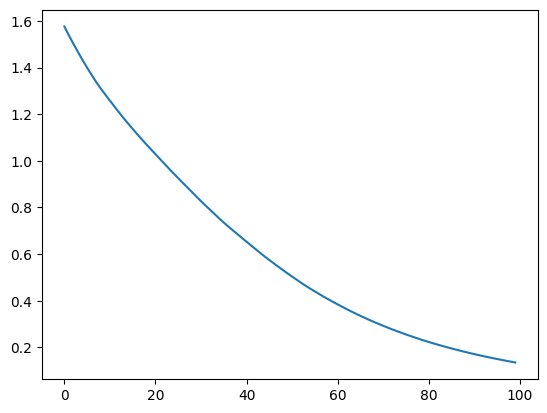

In [75]:
plt.plot(hist.history['loss'])
plt.show()

### 推論

In [76]:
x_pred = tf.constant(
    [
        [
            [1., 0., 0., 0., 0.],
            [1., 0., 0., 0., 0.],
            [1., 0., 0., 0., 0.],
            [1., 1., 0., 0., 1.],
            [1., 1., 1., 1., 1.],
        ],
        [
            [1., 1., 1., 1., 1.],
            [1., 1., 0., 0., 1.],
            [1., 0., 0., 0., 1.],
            [1., 0., 0., 1., 1.],
            [1., 1., 1., 1., 1.],
        ],
        [
            [1., 0., 0., 0., 1.],
            [1., 0., 0., 0., 1.],
            [1., 0., 0., 0., 1.],
            [0., 1., 1., 1., 0.],
            [0., 0., 1., 0., 0.],
        ],
        [
            [1., 1., 1., 1., 1.],
            [1., 0., 0., 0., 0.],
            [1., 1., 1., 1., 0.],
            [1., 0., 0., 0., 0.],
            [1., 1., 1., 1., 1.],
        ],
    ]
)

In [77]:
y_pred = model.predict(x_pred)
[classes[y] for y in tf.math.argmax(y_pred, axis=1).numpy()]

1/1 [==============================] - 0s 47ms/step


['L', 'O', 'V', 'E']